In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
pd.set_option("display.max_columns",100)

In [2]:
event_type=pd.read_csv('event_type.csv')
event_type.sample(3)

,id,event_type
19518,13877,event_type 46
7014,7013,event_type 34
23797,4989,event_type 23


In [3]:
event_type.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31170 entries, 0 to 31169
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          31170 non-null  int64 
 1   event_type  31170 non-null  object
dtypes: int64(1), object(1)
memory usage: 487.2+ KB


In [4]:
event_type['event_type'].replace('[^0-9.]','',inplace=True,regex=True)
event_type.sample(3)

,id,event_type
23782,17961,14
21812,15305,11
20165,17009,11


In [5]:
log_feature=pd.read_csv('log_feature.csv')

In [6]:
log_feature.sample(3)

,id,log_feature,volume
35049,2079,feature 37,3
41113,14488,feature 74,1
37288,6209,feature 305,7


In [7]:
log_feature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58671 entries, 0 to 58670
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           58671 non-null  int64 
 1   log_feature  58671 non-null  object
 2   volume       58671 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.3+ MB


In [8]:
log_feature['log_feature'].replace('[^0-9.]','',inplace=True,regex=True)
log_feature.sample(3)

,id,log_feature,volume
8625,14121,232,19
13033,18488,232,7
37586,13104,368,5


In [9]:
resource_type=pd.read_csv('resource_type.csv')
resource_type.sample(3)

,id,resource_type
3619,10651,resource_type 2
15439,3098,resource_type 8
18320,10069,resource_type 8


In [10]:
resource_type.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21076 entries, 0 to 21075
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             21076 non-null  int64 
 1   resource_type  21076 non-null  object
dtypes: int64(1), object(1)
memory usage: 329.4+ KB


In [11]:
resource_type['resource_type'].replace('[^0-9.]','',inplace=True,regex=True)
resource_type.sample(3)

,id,resource_type
11328,4024,8
7009,15109,2
2997,4411,2


In [12]:
resource_type.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21076 entries, 0 to 21075
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             21076 non-null  int64 
 1   resource_type  21076 non-null  object
dtypes: int64(1), object(1)
memory usage: 329.4+ KB


In [13]:
severity_type=pd.read_csv('severity_type.csv')
severity_type.sample(3)

,id,severity_type
7966,4744,severity_type 2
9761,15454,severity_type 2
9644,12262,severity_type 2


In [14]:
severity_type['severity_type'].replace('[^0-9.]','',inplace=True,regex=True)
severity_type.sample(3)

,id,severity_type
17461,8198,1
5062,15416,1
14143,12788,1


In [15]:
train=pd.read_csv('train.csv')
train.sample(4)

,id,location,fault_severity
264,5260,location 1111,0
1189,11134,location 1083,0
6344,6753,location 91,0
4050,15237,location 33,1


In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7381 entries, 0 to 7380
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              7381 non-null   int64 
 1   location        7381 non-null   object
 2   fault_severity  7381 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 173.1+ KB


In [17]:
train['location'].replace('[^0-9.]','',inplace=True,regex=True)
train.sample(3)

,id,location,fault_severity
335,17654,477,0
2011,4630,1008,0
3091,12321,242,0


In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7381 entries, 0 to 7380
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              7381 non-null   int64 
 1   location        7381 non-null   object
 2   fault_severity  7381 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 173.1+ KB


In [19]:
df=train.merge(event_type,on='id').merge(resource_type,on='id').merge(severity_type,on='id').merge(log_feature,on='id')
df.sample(5)

,id,location,fault_severity,event_type,resource_type,severity_type,log_feature,volume
55576,16268,837,1,14,2,1,306,2
40337,357,894,0,42,2,1,375,17
2727,17654,477,0,11,2,1,315,1
26089,9787,1014,1,11,6,1,273,2
3474,14595,1,1,15,8,2,82,4


In [25]:
df.isnull().sum()

id                0
location          0
fault_severity    0
event_type        0
resource_type     0
severity_type     0
log_feature       0
volume            0
dtype: int64

In [26]:
df.corr()

,id,fault_severity,volume
id,1.000000,-0.045528,-0.003244
fault_severity,-0.045528,1.000000,-0.027196
volume,-0.003244,-0.027196,1.000000


In [27]:
df.describe()

,id,fault_severity,volume
count,61839.000000,61839.000000,61839.000000
mean,9104.379469,0.549168,8.390336
std,5387.274195,0.727701,22.902491
min,1.000000,0.000000,1.000000
25%,4353.000000,0.000000,1.000000
50%,8981.000000,0.000000,2.000000
75%,13664.000000,1.000000,6.000000
max,18550.000000,2.000000,877.000000


<AxesSubplot:>

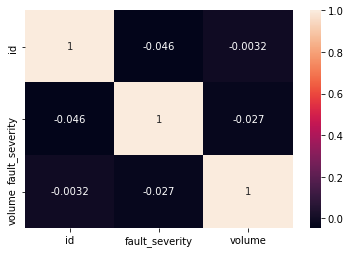

In [28]:
sns.heatmap(df.corr(),annot=True)

In [29]:
df.sample(5)

,id,location,fault_severity,event_type,resource_type,severity_type,log_feature,volume
48332,6284,714,1,14,4,1,91,1
60021,795,723,1,11,2,1,219,1
35329,11733,311,0,34,2,2,312,6
30376,14942,894,0,45,2,1,375,39
10589,12908,444,0,20,2,1,221,1


In [30]:
x,y=df.drop('fault_severity',axis=1),df[['fault_severity']]

In [31]:
x=pd.get_dummies(x,drop_first=True)

In [32]:
x.shape,y.shape

((61839, 1321), (61839, 1))

In [33]:
 x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=60)

In [34]:
from sklearn.ensemble import GradientBoostingClassifier
GBC=GradientBoostingClassifier()
GBC.fit(x_train,y_train)

GradientBoostingClassifier()

In [35]:
predict_gbc=GBC.predict_proba(x_test)

In [36]:
predict_gbc[:,:]

array([[0.15466966, 0.79889166, 0.04643868],
       [0.92518906, 0.05712102, 0.01768992],
       [0.57294904, 0.31156413, 0.11548683],
       ...,
       [0.47210007, 0.23501099, 0.29288894],
       [0.63545072, 0.19602108, 0.16852819],
       [0.63197711, 0.10394191, 0.26408098]])

In [37]:
result=pd.DataFrame({
    "id":x_test.id,
    "Predicted fault severity":y_test.fault_severity,
    "Prediction probility_0":predict_gbc[:,0],
    "Prediction probility_1":predict_gbc[:,1],
    "Prediction probility_2":predict_gbc[:,2]
})

In [39]:
result.sample(5)

,id,Predicted fault severity,Prediction probility_0,Prediction probility_1,Prediction probility_2
15900,18428,0,0.837103,0.147288,0.015610
39278,5923,1,0.432199,0.438036,0.129765
41751,14831,0,0.930459,0.057412,0.012129
2388,17883,2,0.294426,0.270796,0.434778
18013,11051,1,0.241442,0.337517,0.421041
